# Anomaly Detection SVM

#### Anomaly Detection for Support Vector Machine (SVM) is an unsupervised model for anomaly or outlier detection. For example, a One-class classification method is used to detect the outliers and anomalies in a dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-12-28'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


In [3]:
# Create more data
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500,0,0,0,0.013832
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400,0,1,0,-0.004043
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800,0,0,1,-0.012177
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200,1,1,1,0.009245
2007-01-10,19.639999,20.020000,19.500000,20.010000,20.010000,19783200,1,1,1,0.018321


In [4]:
dataset.shape

(3017, 10)

In [5]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3.017000e+03,3017.000000,3017.000000,3017.000000,3017.000000
mean,7.306695,7.460504,7.137385,7.296622,7.296622,3.206285e+07,0.479284,0.477958,0.481936,0.000689
std,5.033517,5.147391,4.903212,5.027697,5.027697,3.005308e+07,0.499653,0.499597,0.499756,0.038377
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,0.000000,0.000000,0.000000,-0.242291
25%,3.620000,3.690000,3.540000,3.610000,3.610000,1.482640e+07,0.000000,0.000000,0.000000,-0.017647
50%,6.110000,6.250000,5.970000,6.120000,6.120000,2.266880e+07,0.000000,0.000000,0.000000,0.000000
75%,9.750000,9.900000,9.530000,9.710000,9.710000,3.692460e+07,1.000000,1.000000,1.000000,0.018648
max,33.180000,34.139999,32.189999,32.720001,32.720001,3.250584e+08,1.000000,1.000000,1.000000,0.522901


In [6]:
from sklearn.svm import OneClassSVM

In [7]:
model = OneClassSVM(kernel = "rbf", gamma = 0.001, nu = 0.05).fit(dataset)
y_pred = model.predict(dataset)

In [8]:
anomaly_values = dataset.iloc[np.where(y_pred == -1)]
anomaly_values

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2007-03-07,14.020000,14.220000,13.900000,14.100000,14.100000,21556900,0,1,1,0.000710
2007-03-08,14.200000,14.270000,13.960000,14.190000,14.190000,21157000,0,1,1,0.006383
2007-05-22,15.480000,15.600000,15.100000,15.420000,15.420000,22971600,0,0,0,-0.000648
2007-08-09,12.900000,13.360000,12.860000,13.080000,13.080000,61830100,0,1,0,-0.025335
2007-08-10,12.960000,13.190000,12.770000,13.010000,13.010000,26582900,0,1,0,-0.005352
...,...,...,...,...,...,...,...,...,...,...
2018-12-19,19.440001,19.719999,18.000000,18.160000,18.160000,120644500,0,0,0,-0.068718
2018-12-20,18.110001,18.860001,17.340000,17.940001,17.940001,119394500,1,1,0,-0.012114
2018-12-21,18.120001,18.340000,16.760000,16.930000,16.930000,132246000,0,0,0,-0.056299


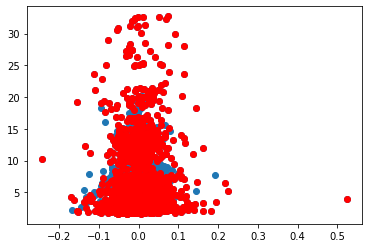

In [9]:
plt.scatter(dataset["Return"], dataset["Adj Close"])
plt.scatter(anomaly_values["Return"],anomaly_values["Adj Close"], c = "r")

In [10]:
model = OneClassSVM(kernel = "rbf", gamma = 0.001, nu = 0.01).fit(dataset)
y_pred = model.predict(dataset)

In [11]:
anomaly_values = dataset.iloc[np.where(y_pred == -1)]
anomaly_values

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2007-02-20,14.93,15.01,14.70,14.92,14.92,21961300,1,0,0,-0.001339
2007-02-21,14.83,14.85,14.52,14.56,14.56,23986900,1,0,0,-0.024129
2007-02-22,14.66,14.70,14.43,14.54,14.54,26771700,0,0,1,-0.001374
2007-02-23,14.59,14.76,14.59,14.69,14.69,22884800,1,1,1,0.010316
2007-02-26,14.83,15.73,14.80,15.68,15.68,65831500,0,1,0,0.067393
...,...,...,...,...,...,...,...,...,...,...
2017-05-31,11.29,11.49,11.10,11.19,11.19,42929000,1,0,0,0.006295
2017-06-01,11.25,11.29,10.81,10.93,10.93,48002000,0,0,0,-0.023235
2017-06-02,10.93,10.96,10.57,10.90,10.90,43056200,1,0,1,-0.002745


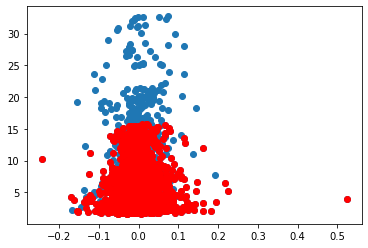

In [12]:
plt.scatter(dataset["Return"], dataset["Adj Close"])
plt.scatter(anomaly_values["Return"],anomaly_values["Adj Close"], c = "r")